In [16]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model
import pandas as pd 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def readData(dataPath: str):
    df = pd.read_csv(dataPath, delimiter=',', header='infer')
    df = df.dropna()
    return df


def plotDataDistribution(dfWorldHappiness):
    fig, axes = plt.subplots(nrows=2, figsize=(15,15))
    axes[0].hist(dfWorldHappiness["Happiness.Score"])
    axes[0].set_title("Happiness")
    axes[1].hist(dfWorldHappiness["Family"])
    axes[1].set_title("Family")
    plt.show()

def plotData(dfWorldHappiness):
    fig, axes = plt.subplots()
    axes.plot(dfWorldHappiness["Family"], dfWorldHappiness["Happiness.Score"], 'ro')
    axes.set_xlabel('Family')
    axes.set_ylabel('Happiness')
    axes.set_title('Relation between Family and Happiness')
    plt.show()

def getTrainingAndValidationSets(dfWorldHappiness):
    dataSize = dfWorldHappiness.shape[0]
    
    trainingIndexSet = np.random.choice(range(dataSize), size=int(0.8 * dataSize), replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet]

    trainingInputSet = [dfWorldHappiness["Family"].iloc[index] for index in trainingIndexSet]
    trainingOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in trainingIndexSet]

    validationInputSet = [dfWorldHappiness["Family"].iloc[index] for index in validationIndexSet]
    validationOutputSet = [dfWorldHappiness["Happiness.Score"].iloc[index] for index in validationIndexSet]

    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet


def plotTrainingAndValidationSets(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dfWorldHappiness)
    fig, axes = plt.subplots()

    plt.plot(trainingInputSet, trainingOutputSet, 'ro', label='TRAINING DATA')
    #training data = cercuri rosii

    plt.plot(validationInputSet, validationOutputSet, 'g^', label='VALIDATION DATA')
    #validation data = triunghiuri verzi

    axes.set_title("Training and validation data")
    axes.set_xlabel("Family")
    axes.set_ylabel("HAPPINESS")
    plt.legend()
    plt.show()
    

def getRegressorFromLibrary(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(dfWorldHappiness)
    X = [[el] for el in trainingInputSet]
    regressor = linear_model.LinearRegression()
    regressor.fit(X, trainingOutputSet)
    return regressor


# def plotRegressor(dfWorldHappiness):
#     trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(dfWorldHappiness)
#     regressor = getRegressorFromLibrary(dfWorldHappiness)
#     w0, w1 = regressor.intercept_, regressor.coef_[0]
#     numberOfPoints = 1000
#     xref = []
#     val = min(trainingInputSet)
#     step = (max(trainingInputSet) - min(trainingInputSet)) / numberOfPoints
#     for i in range(1, numberOfPoints):
#         xref.append(val)
#         val += step
#     yref = [w0 + w1*el for el in xref]

#     fig, axes = plt.subplots()
#     axes.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'TRAINING DATA')
#     #training data = cercuri rosii

#     axes.plot(xref, yref, 'b-', label= 'LEARNED MODEL')
#     #linii albastre

#     axes.set_title('Training data and learned model')
#     axes.set_xlabel('Family')
#     axes.set_ylabel('HAPPINESS')
#     axes.legend()
#     plt.show()

def plotRegressor(dfWorldHappiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(dfWorldHappiness)
    regressor = getRegressorFromLibrary(dfWorldHappiness)
    w0, w1 = regressor.intercept_, regressor.coef_[0]    
    # Generate x values for plotting
    x_min = min(trainingInputSet) - 1
    x_max = max(trainingInputSet) + 1
    xref = np.linspace(x_min, x_max, 100)
    yref = w0 + w1 * xref

    fig, axes = plt.subplots()
    axes.plot(trainingInputSet, trainingOutputSet, 'ro', label='TRAINING DATA')
    axes.plot(xref, yref, 'b-', label='LEARNED MODEL')

    axes.set_title('Training data and learned model')
    axes.set_xlabel('Family')
    axes.set_ylabel('HAPPINESS')
    axes.legend()
    plt.show()

def getErrors(dfWorldHappiness):
    _,_, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dfWorldHappiness)
    regressor = getRegressorFromLibrary(dfWorldHappiness)
    computedValidationOutputs = regressor.predict([[x] for x in validationInputSet])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2)**2
    manualError = manualError / len(validationOutputSet)
    computedError = mean_squared_error(validationOutputSet, computedValidationOutputs)
    return manualError, computedError

## PROBLEMA V1 - Family

<h2>Distributia datelor</h2>

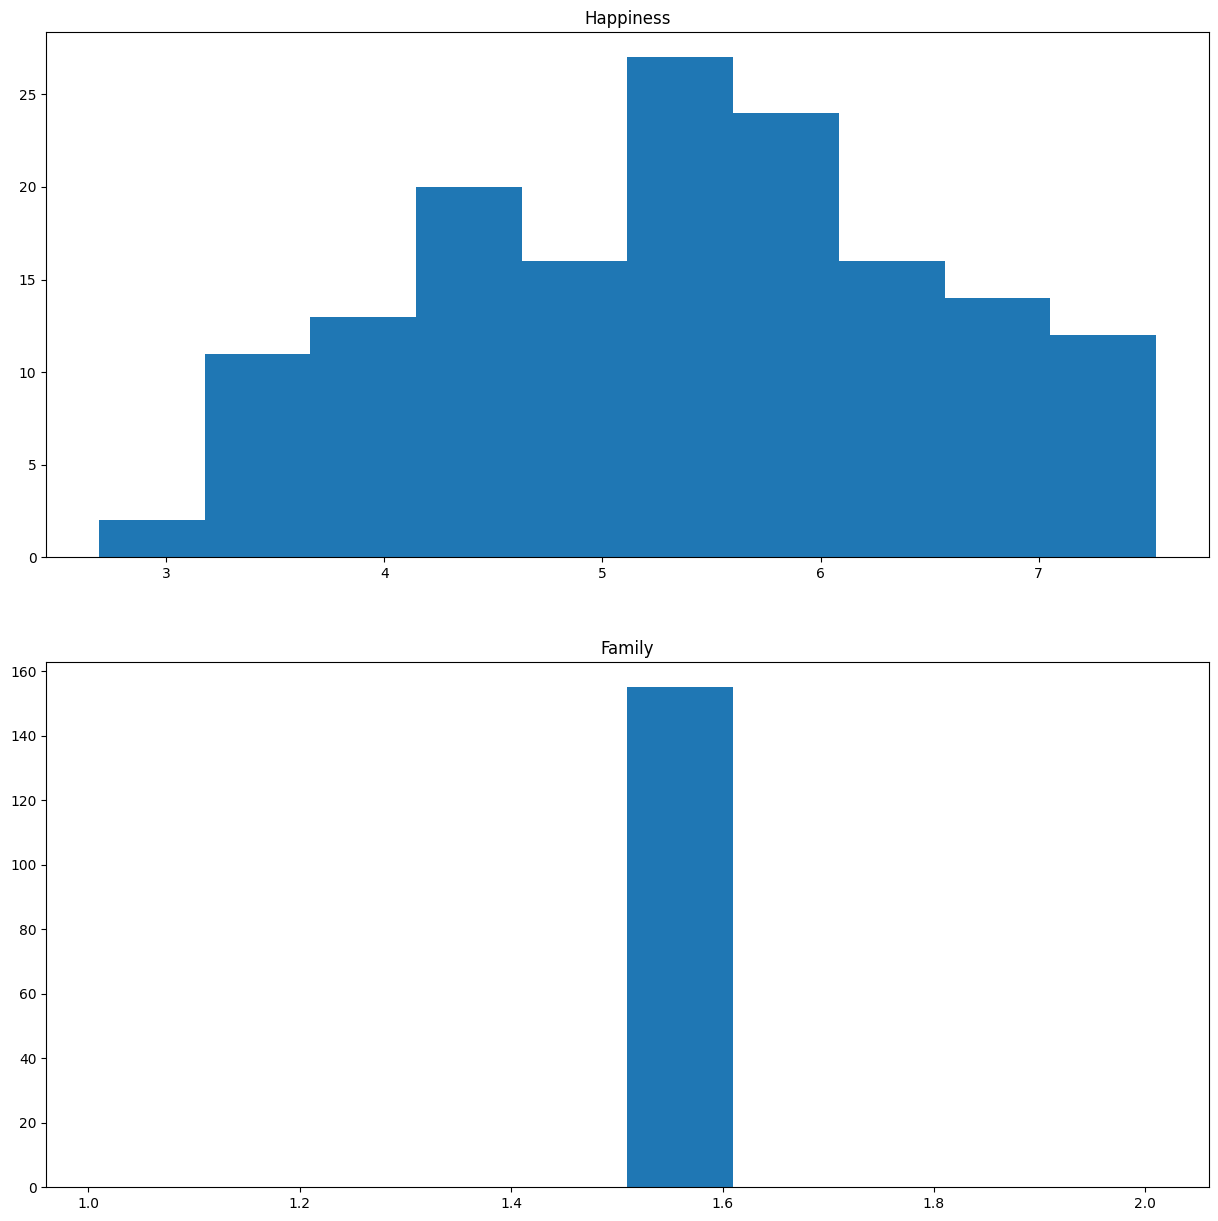

In [17]:
worldHappiness = readData("v1_world-happiness-report-2017.csv");
plotDataDistribution(worldHappiness)

<h2>Plot data</h2>

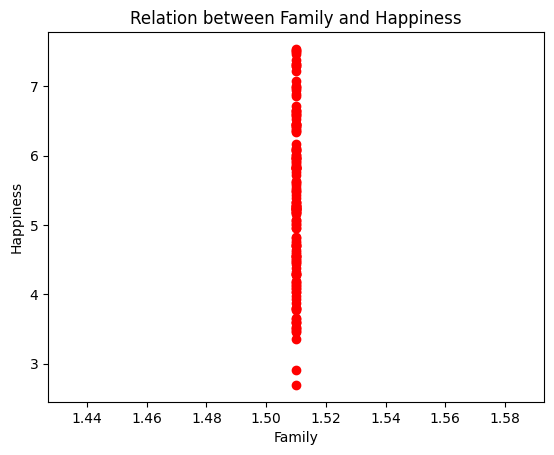

In [18]:
plotData(worldHappiness)

<h2>Impartirea datelor in date de antrenament si date de test</h2>

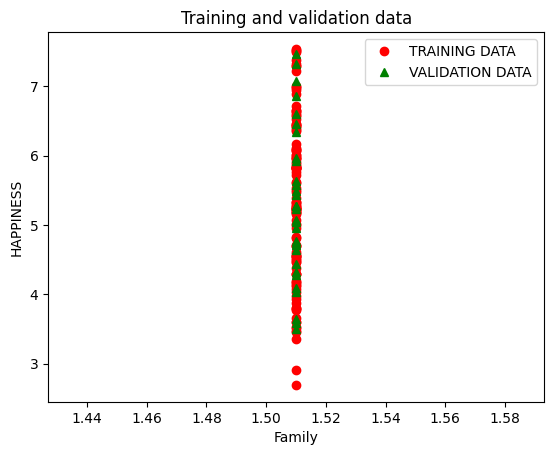

In [19]:
plotTrainingAndValidationSets(worldHappiness)

<h2>Regresor</h2>

LEARNED MODEL: f(x) =  0.3621805967860938  +  3.2890220933653156  * x
MANUAL ERROR =  1.091197892970259
COMPUTED ERROR =  1.091197892970259


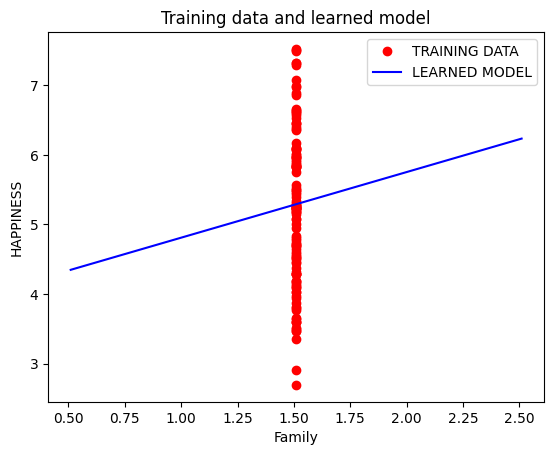

In [43]:
regressor = getRegressorFromLibrary(worldHappiness)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print("LEARNED MODEL: f(x) = ", w0, " + ", w1, " * x")

manualError, computedError = getErrors(worldHappiness)
print("MANUAL ERROR = ", manualError)
print("COMPUTED ERROR = ", computedError)
plotRegressor(worldHappiness)

## Problema V2 - Family

<h2>Distributia datelor</h2>

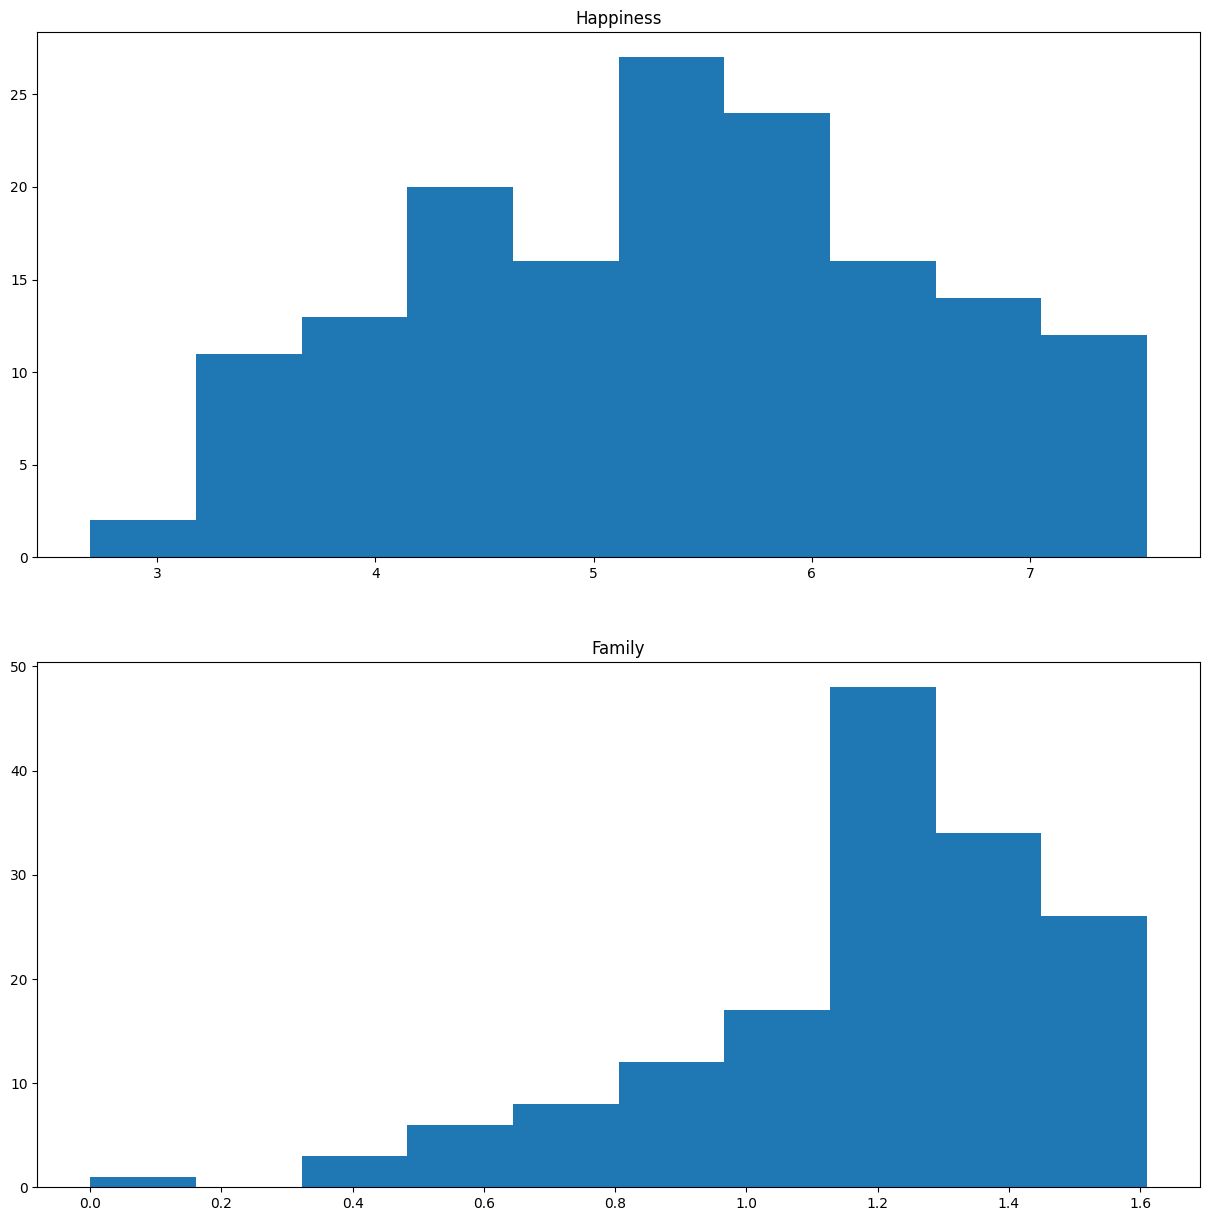

In [21]:
worldHappiness2 = readData("v2_world-happiness-report-2017.csv");
plotDataDistribution(worldHappiness2)

<h2>Plot data</h2>

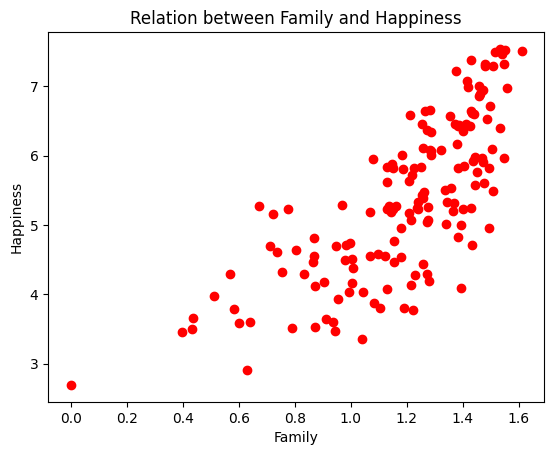

In [22]:
plotData(worldHappiness2)

<h2>Impartirea datelor in date de antrenament si date de test</h2>

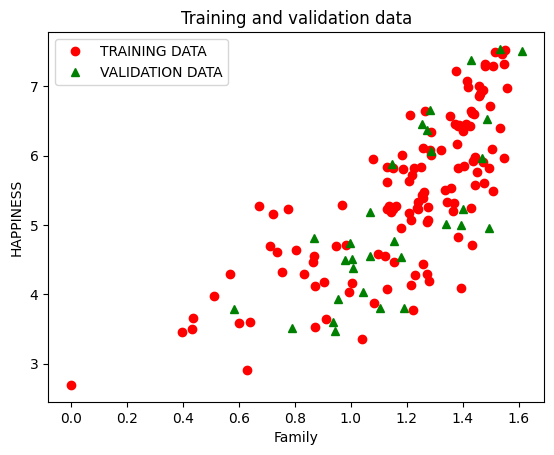

In [23]:
plotTrainingAndValidationSets(worldHappiness2)

<h2>Regresor</h2>

LEARNED MODEL: f(x) =  1.8264694563190718  +  2.958824022453153  * x
MANUAL ERROR =  0.6584931079733889
COMPUTED ERROR =  0.6584931079733889


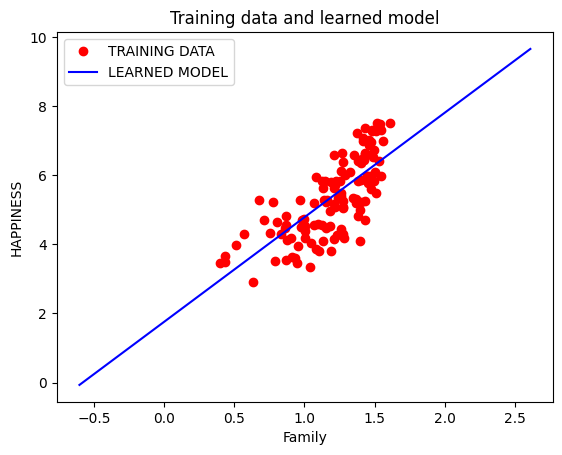

In [24]:
regressor = getRegressorFromLibrary(worldHappiness2)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print("LEARNED MODEL: f(x) = ", w0, " + ", w1, " * x")

manualError, computedError = getErrors(worldHappiness2)
print("MANUAL ERROR = ", manualError)
print("COMPUTED ERROR = ", computedError)
plotRegressor(worldHappiness2)

## Problema V3 - Family

<h2>Distributia datelor</h2>

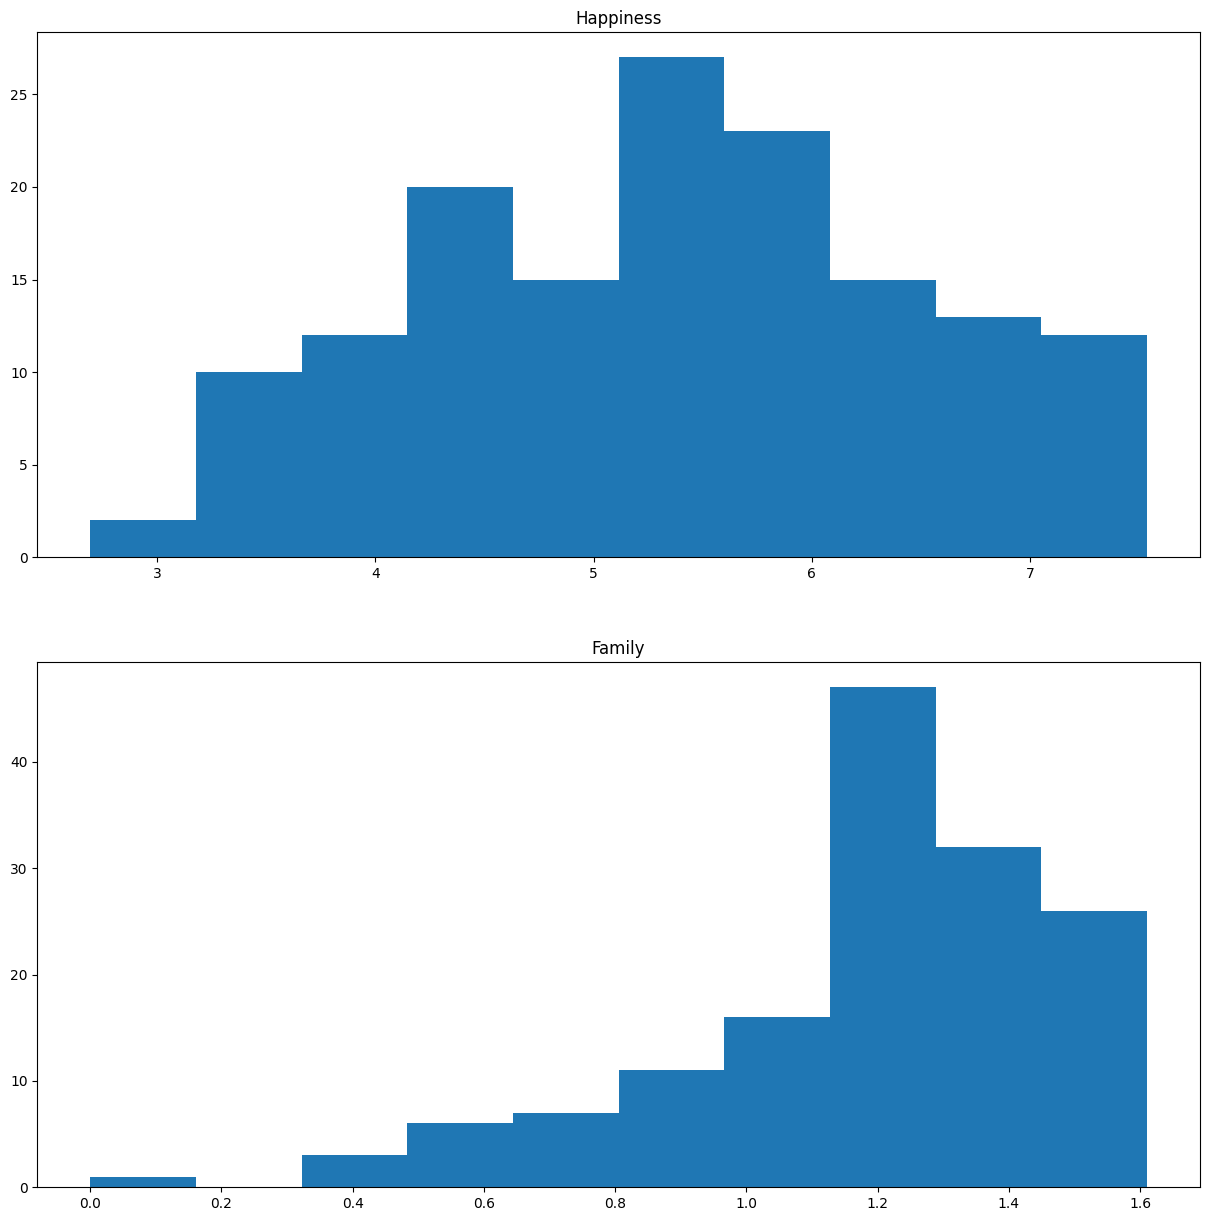

In [25]:
worldHappiness3 = readData("v3_world-happiness-report-2017.csv");
plotDataDistribution(worldHappiness3)

<h2>Plot data</h2>

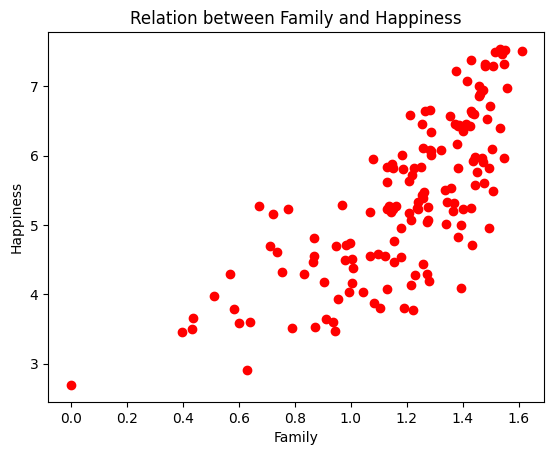

In [26]:
plotData(worldHappiness3)

<h2>Impartirea datelor in date de antrenament si date de test</h2>

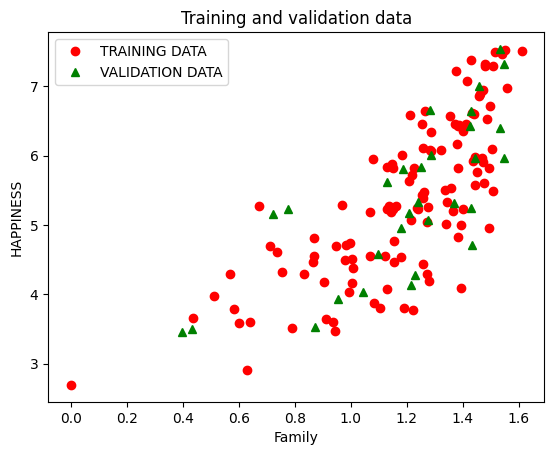

In [27]:
plotTrainingAndValidationSets(worldHappiness3)

<h2>Regresor</h2>

LEARNED MODEL: f(x) =  1.970422170268554  +  2.8586311461290705  * x
MANUAL ERROR =  0.4345364704722469
COMPUTED ERROR =  0.43453647047224686


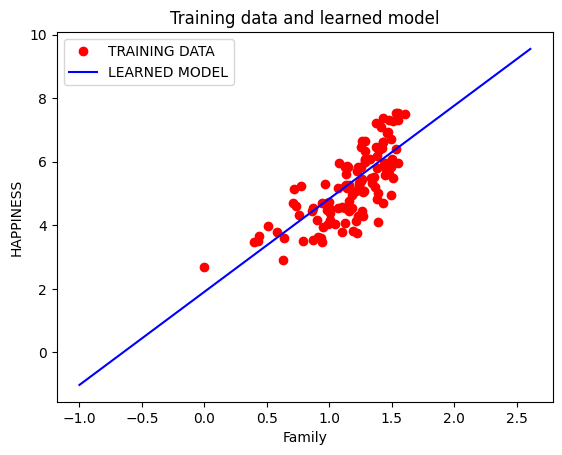

In [28]:
regressor = getRegressorFromLibrary(worldHappiness3)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print("LEARNED MODEL: f(x) = ", w0, " + ", w1, " * x")

manualError, computedError = getErrors(worldHappiness3)
print("MANUAL ERROR = ", manualError)
print("COMPUTED ERROR = ", computedError)
plotRegressor(worldHappiness3)